# Combining Features

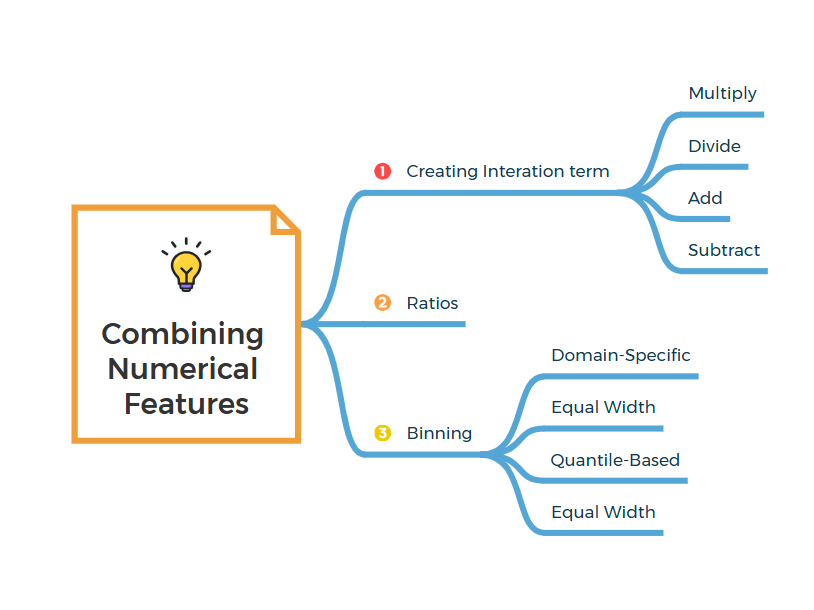

# 1. Creating Interaction terms

Creating interaction terms in numerical feature engineering involves generating new features by combining two or more existing numerical features. The goal is to capture potential relationships between these original features that might have a combined effect on the target variable, which wouldn't be evident by looking at the features in isolation.

Here's a breakdown with examples:

How Interaction Terms are Created:

The most common way to create interaction terms is through multiplication of the original features. Other operations like division, addition, or subtraction can also be used depending on the domain and the hypothesized relationship, but multiplication is the most frequent.

Example:

Let's say you're trying to predict the fuel efficiency (miles per gallon) of a car, and you have two numerical features:

Engine Size (in liters)

Weight (in kilograms)

A simple model might consider the individual effects of engine size and weight on fuel efficiency. However, it's plausible that the combination of a large engine and a heavy car has a disproportionately larger negative impact on fuel efficiency than just the sum of their individual effects.

To capture this interaction, you can create a new interaction term:

Interaction_EngineSize_Weight = Engine Size * Weight

Now, your model can consider not only how engine size and weight individually affect fuel efficiency but also how their combination influences it.

Other Examples of Interaction Terms:

Advertising Spend and Seasonality: If you have "Advertising Spend" and a numerical representation of the "Month of the Year," their interaction term could capture how the effectiveness of advertising spend varies across different seasons. (Advertising Spend * Month)

Temperature and Humidity: In predicting plant growth, an interaction term between "Temperature" and "Humidity" might be important, as the effect of temperature on growth could be different at high versus low humidity levels. (Temperature * Humidity)

Income and Education Level: In predicting loan default risk, the interaction between "Income" and "Years of Education" might be more informative than each feature alone. (Income * Years of Education)

When are Interaction Terms Useful?

1. Domain Knowledge Suggests Combined Effects: When you have reason to believe that the interplay between two or more features is significant for the outcome you're trying to predict.
2. Non-Additive Relationships: When the effect of one feature depends on the value of another feature. In our car example, the "penalty" of a large engine might be amplified in a heavy car.
3. Improving Model Accuracy: If a model using only the original features isn't performing well, adding relevant interaction terms can sometimes capture more complex patterns in the data and improve predictive power.
4. Understanding Feature Importance: Interaction terms can sometimes reveal which combinations of features are most influential on the target variable.

How Interaction Terms Help:

1. Capture Non-Linearities (Indirectly): While the interaction term itself is often a product (a form of non-linear operation), it allows linear models (like linear regression) to model more complex, non-additive relationships in the data.
2. Increase Model Flexibility: By adding interaction terms, you are essentially creating new dimensions in your feature space, allowing the model to learn more intricate decision boundaries.
3. Provide More Granular Insights: Interaction terms can highlight specific conditions or combinations of feature values that have a particularly strong effect on the target.

# Import necessary dependencies

In [141]:
import pandas as pd

# Create sample dataset

In [142]:
# Sample DataFrame representing some features of products
data = pd.DataFrame({
    'Price': [250, 300, 150, 400, 200],  # Price of the product (in Rupees, considering Kolkata context)
    'Discount_Percentage': [0.10, 0.05, 0.20, 0.00, 0.15], # Discount applied (as a fraction)
    'Shipping_Cost': [50, 60, 40, 75, 55] # Shipping cost (in Rupees)
})

data

,Price,Discount_Percentage,Shipping_Cost
0,250,0.10,50
1,300,0.05,60
2,150,0.20,40
3,400,0.00,75
4,200,0.15,55


# Example implementation of Interaction terms

In [143]:
# 1. Interaction Term: Discounted Price
# Captures the combined effect of price and discount

data['Discounted_Price'] = data['Price'] * (1 - data['Discount_Percentage'])
print("\nData with Discounted Price (Price * (1 - Discount_Percentage)):")
data


Data with Discounted Price (Price * (1 - Discount_Percentage)):


,Price,Discount_Percentage,Shipping_Cost,Discounted_Price
0,250,0.10,50,225.0
1,300,0.05,60,285.0
2,150,0.20,40,120.0
3,400,0.00,75,400.0
4,200,0.15,55,170.0


In [144]:
# 2. Interaction Term: Price per Unit Shipping Cost
# Might be relevant if you want to see how expensive the shipping is relative to the price

data['Price_Per_Unit_Shipping'] = data['Price'] / data['Shipping_Cost']
print("\nData with Price per Unit Shipping Cost (Price / Shipping_Cost):")
data


Data with Price per Unit Shipping Cost (Price / Shipping_Cost):


,Price,Discount_Percentage,Shipping_Cost,Discounted_Price,Price_Per_Unit_Shipping
0,250,0.10,50,225.0,5.000000
1,300,0.05,60,285.0,5.000000
2,150,0.20,40,120.0,3.750000
3,400,0.00,75,400.0,5.333333
4,200,0.15,55,170.0,3.636364


In [145]:
# 3. Interaction Term: Discount Amount
# Another way to represent the interaction of price and discount

data['Discount_Amount'] = data['Price'] * data['Discount_Percentage']
print("\nData with Discount Amount (Price * Discount_Percentage):")
data


Data with Discount Amount (Price * Discount_Percentage):


,Price,Discount_Percentage,Shipping_Cost,Discounted_Price,Price_Per_Unit_Shipping,Discount_Amount
0,250,0.10,50,225.0,5.000000,25.0
1,300,0.05,60,285.0,5.000000,15.0
2,150,0.20,40,120.0,3.750000,30.0
3,400,0.00,75,400.0,5.333333,0.0
4,200,0.15,55,170.0,3.636364,30.0


In [146]:
# 4. Interaction Term: Total Cost (Simple addition, but can be considered an interaction)
# Combining price and shipping cost

data['Total_Cost'] = data['Price'] + data['Shipping_Cost']
print("\nData with Total Cost (Price + Shipping_Cost):")
data


Data with Total Cost (Price + Shipping_Cost):


,Price,Discount_Percentage,Shipping_Cost,Discounted_Price,Price_Per_Unit_Shipping,Discount_Amount,Total_Cost
0,250,0.10,50,225.0,5.000000,25.0,300
1,300,0.05,60,285.0,5.000000,15.0,360
2,150,0.20,40,120.0,3.750000,30.0,190
3,400,0.00,75,400.0,5.333333,0.0,475
4,200,0.15,55,170.0,3.636364,30.0,255


In [147]:
# create interaction terms between more than two features
# Example: Interaction of Discount Amount and Shipping Cost

data['Discount_Shipping_Interaction'] = data['Discount_Amount'] * data['Shipping_Cost']
print("\nData with Discount Amount * Shipping Cost:")
data


Data with Discount Amount * Shipping Cost:


,Price,Discount_Percentage,Shipping_Cost,Discounted_Price,Price_Per_Unit_Shipping,Discount_Amount,Total_Cost,Discount_Shipping_Interaction
0,250,0.10,50,225.0,5.000000,25.0,300,1250.0
1,300,0.05,60,285.0,5.000000,15.0,360,900.0
2,150,0.20,40,120.0,3.750000,30.0,190,1200.0
3,400,0.00,75,400.0,5.333333,0.0,475,0.0
4,200,0.15,55,170.0,3.636364,30.0,255,1650.0


'Shipping_Cost', 'Discounted_Price', 'Price_Per_Unit_Shipping','Discount_Amount', 'Total_Cost', 'Discount_Shipping_Interaction' are all interaction terms

# 2. Ratios

Creating ratios  in numerical feature engineering involves generating new features by dividing one numerical feature by another. The resulting ratio can often capture meaningful relationships or proportions between the original features that might be more informative for a machine learning model than the individual features alone.

How Ratios are Created:

A ratio is simply the result of dividing one numerical feature by another. You need to carefully consider which features to divide and the potential meaning of the resulting ratio in the context of your problem.

Example:

Let's consider an e-commerce scenario in Kolkata where you are trying to predict the likelihood of a customer making a repeat purchase. You might have the following numerical features:

Total Amount Spent (in Rupees)

Number of Orders Placed

While both of these features are individually informative, their ratio can provide a valuable insight:

Average Order Value = Total Amount Spent / Number of Orders Placed

This new feature, "Average Order Value," tells you the average amount a customer spends per order. A customer with a high total spend but many small orders might have a different repeat purchase behavior than a customer with the same total spend but fewer, larger orders. The ratio captures this nuance.

Other Examples of Ratio Features:

Loan Applications:

1. Debt-to-Income Ratio = Total Debt / Annual Income (indicates financial leverage)
2. Loan Amount to Property Value = Loan Amount / Property Value (indicates the size of the loan relative to the asset)

Website Analytics:

1. Click-Through Rate (CTR) = Number of Clicks / Number of Impressions (measures the effectiveness of an ad or link)
2. Conversion Rate = Number of Conversions / Number of Visitors (measures how well a website turns visitors into desired actions)

Healthcare:

1. Body Mass Index (BMI) = Weight (kg) / Height (m)^2 (a standard measure of body fat)
2. Heart Rate Variability (HRV) = Standard Deviation of Inter-Beat Intervals (a measure of the variation in time between heartbeats, often used as an indicator of health)

Manufacturing:

1. Defect Rate = Number of Defective Units / Total Units Produced (measures the quality of the production process)

When are Ratio Features Useful?

1. Understanding Proportions: When the relationship between two quantities is more important than their absolute values. The average order value is a proportion of total spending per interaction.
2. Normalizing for Scale: Ratios can help to normalize for the size or scale of a particular entity. For example, defect rate normalizes the number of defects by the total production volume.
3. Capturing Efficiency or Intensity: Ratios often represent a rate, efficiency, or intensity. Click-through rate measures the efficiency of an ad in generating clicks.
4. Domain Knowledge Suggests Relative Importance: When your understanding of the domain suggests that the relationship between two features is a key indicator. Debt-to-income ratio is a standard metric in finance.
5. Dealing with Scale Differences: If two features have vastly different scales, their ratio can bring them to a more comparable range.

How Ratio Features Help:

1. Provide New Interpretations: Ratios create features with new meanings that can be directly relevant to the problem.
2. Highlight Relative Performance: They can help in comparing entities based on their relative performance rather than absolute numbers.
3. Improve Model Robustness: By focusing on proportions, models might become less sensitive to the absolute scale of individual features.
4. Can Reveal Non-Linear Relationships (Indirectly): Similar to interaction terms created by multiplication, ratios can help linear models capture certain types of non-linear relationships.

# Import necessary dependencies

In [149]:
import pandas as pd

# Example 1 - Create sample dataset

In [150]:
# Sample DataFrame representing customer order data
data = pd.DataFrame({
    'Total_Amount_Spent': [15000, 22000, 8000, 35000, 12000], # Total amount spent by customer (in Rupees)
    'Number_of_Orders': [10, 15, 5, 20, 8] # Number of orders placed by customer
})

print("Original Data:")
data

Original Data:


,Total_Amount_Spent,Number_of_Orders
0,15000,10
1,22000,15
2,8000,5
3,35000,20
4,12000,8


In [151]:
# Create the Average Order Value ratio

data['Average_Order_Value'] = data['Total_Amount_Spent'] / data['Number_of_Orders']
print("\nData with Average Order Value:")
data


Data with Average Order Value:


,Total_Amount_Spent,Number_of_Orders,Average_Order_Value
0,15000,10,1500.000000
1,22000,15,1466.666667
2,8000,5,1600.000000
3,35000,20,1750.000000
4,12000,8,1500.000000


# Example 2 - Create dataset

In [152]:
# Example with website data
website_data = pd.DataFrame({
    'Clicks': [150, 220, 80, 350, 120],
    'Impressions': [1000, 2500, 500, 4000, 1500]
})

print("\nOriginal Website Data:")
website_data


Original Website Data:


,Clicks,Impressions
0,150,1000
1,220,2500
2,80,500
3,350,4000
4,120,1500


In [153]:
# Create Click-Through Rate (CTR)

website_data['CTR'] = website_data['Clicks'] / website_data['Impressions']
print("\nData with Click-Through Rate:")
website_data


Data with Click-Through Rate:


,Clicks,Impressions,CTR
0,150,1000,0.1500
1,220,2500,0.0880
2,80,500,0.1600
3,350,4000,0.0875
4,120,1500,0.0800


In these examples, we create new ratio features by simply dividing one column of the Pandas DataFrame by another. The resulting ratio columns can then be used as features in your machine learning models. Remember to consider the potential for division by zero and handle such cases appropriately (e.g., by adding a small constant or filtering the data).

# 3. Binning

Binning (also known as discretization or bucketing) in numerical feature engineering involves transforming a continuous numerical feature into a categorical feature by grouping its values into a limited number of discrete intervals or "bins." Instead of the original numerical value, the data point is represented by the bin it falls into.

How Binning Works:

1. Define Bins: You first need to decide on the number of bins and the boundaries (cut-off points) that define each bin. These boundaries can be:

Equal Width: Bins have the same range of values (e.g., 0-10, 11-20, 21-30).

Equal Frequency (Quantile-based): Each bin contains roughly the same number of data points (e.g., quartiles, deciles).

Domain-Specific: Bin boundaries are defined based on expert knowledge or specific thresholds relevant to the problem (e.g., age groups like child, teenager, adult, senior).

2. Assign Data Points to Bins: Once the bins are defined, each numerical value in the original feature is assigned to the bin it falls within.

3. Represent Bins: The bins can be represented in various ways:

Bin Number: Assigning an integer index to each bin (e.g., 0, 1, 2).

Bin Range: Using the interval boundaries (e.g., "0-10", "11-20").

Categorical Labels: Giving meaningful names to the bins (e.g., "Low", "Medium", "High").

Example:

Let's say you have a numerical feature "Age" of customers in an e-commerce platform in Kolkata.

Original "Age" data: [25, 32, 18, 45, 60, 28, 70, 35, 22, 50]

You could decide to create three equal-width bins:

Bin 1: 18-35 (Young Adult)

Bin 2: 36-55 (Middle-Aged Adult)

Bin 3: 56-75 (Senior Adult)

After binning, the "Age" data would be transformed into:

["Young Adult", "Young Adult", "Young Adult", "Middle-Aged Adult", "Senior Adult", "Young Adult", "Senior Adult", "Young Adult", "Young Adult", "Middle-Aged Adult"]

When is Binning Useful?

1. Converting Continuous to Categorical: Some machine learning models (especially certain rule-based or tree-based algorithms) handle categorical features more naturally or can benefit from them.
2. Handling Non-Linear Relationships: Binning can help capture non-linear relationships between a numerical feature and the target variable. For example, the effect of age on purchasing behavior might not be linear; different age groups might have distinct preferences.
3. Simplifying Complex Relationships: By grouping values, binning can simplify a complex continuous relationship, making it easier for a model to learn.
4. Making Features More Robust to Outliers: Outliers in a continuous feature might fall into their own bins or extreme bins, reducing their influence on the overall relationship learned by the model.
5. Feature Interaction (Indirectly): By binning multiple numerical features, you can then treat the combinations of their bins as new categorical features, effectively creating a form of interaction term. For example, binning "Income Level" (Low, Medium, High) and "Age Group" (Young, Middle, Senior) allows you to analyze the behavior of "Young & High Income" customers as a distinct group.
6. Privacy and Data Anonymization: Binning can be used to anonymize numerical data by grouping specific values into broader categories.

How Binning Helps:

1. Improved Model Performance: For certain models, especially those that struggle with continuous variables or non-linearities, binning can lead to better predictive accuracy.
2. Increased Interpretability: Categorical features resulting from binning can sometimes be easier to interpret than continuous variables. For example, understanding the purchasing behavior of "Young Adults" might be more intuitive than analyzing the effect of every single year of age.
3. Better Handling of Missing Values (Potentially): Missing values can sometimes be treated as a separate bin.

# Import necessary dependencies

In [154]:
import pandas as pd
import numpy as np

# Create sample dataset

In [155]:
#  DataFrame representing Men's Sports Apparel
data = pd.DataFrame({
    'Price_INR': [320, 409, 650, 1200, 850, 500, 999, 250, 1500, 700], # Prices in Indian Rupees
    'Rating_Out_Of_5': [4.2, 3.9, 4.5, 4.1, 3.7, 4.0, 4.3, 3.5, 4.6, 3.8],
    'Number_of_Reviews': [55, 32, 120, 78, 25, 40, 95, 15, 150, 60],
    'Discount_Percentage': [0.0, 0.15, 0.05, 0.20, 0.10, 0.0, 0.25, 0.30, 0.0, 0.18]
})

print("Original Product Data:")
data

Original Product Data:


,Price_INR,Rating_Out_Of_5,Number_of_Reviews,Discount_Percentage
0,320,4.2,55,0.00
1,409,3.9,32,0.15
2,650,4.5,120,0.05
3,1200,4.1,78,0.20
4,850,3.7,25,0.10
5,500,4.0,40,0.00
6,999,4.3,95,0.25
7,250,3.5,15,0.30
8,1500,4.6,150,0.00
9,700,3.8,60,0.18


In [156]:
# 1. Binning 'Price_INR' into Price Categories (Domain-Specific)

bins_price = [0, 500, 1000, 1500, np.inf]
labels_price = ['Budget', 'Affordable', 'Mid-Range', 'Premium']
data['Price_Category'] = pd.cut(data['Price_INR'], bins=bins_price, labels=labels_price, right=False)
print("\nData with Binned Price Category:")
data


Data with Binned Price Category:


,Price_INR,Rating_Out_Of_5,Number_of_Reviews,Discount_Percentage,Price_Category
0,320,4.2,55,0.00,Budget
1,409,3.9,32,0.15,Budget
2,650,4.5,120,0.05,Affordable
3,1200,4.1,78,0.20,Mid-Range
4,850,3.7,25,0.10,Affordable
5,500,4.0,40,0.00,Affordable
6,999,4.3,95,0.25,Affordable
7,250,3.5,15,0.30,Budget
8,1500,4.6,150,0.00,Premium
9,700,3.8,60,0.18,Affordable


In [157]:
# 2. Binning 'Rating_Out_Of_5' into Rating Levels (Equal Width)

bins_rating = [0, 3, 4, 5]
labels_rating = ['Low', 'Average', 'High']
data['Rating_Level'] = pd.cut(data['Rating_Out_Of_5'], bins=bins_rating, labels=labels_rating, right=False)
print("\nData with Binned Rating Level:")
data


Data with Binned Rating Level:


,Price_INR,Rating_Out_Of_5,Number_of_Reviews,Discount_Percentage,Price_Category,Rating_Level
0,320,4.2,55,0.00,Budget,High
1,409,3.9,32,0.15,Budget,Average
2,650,4.5,120,0.05,Affordable,High
3,1200,4.1,78,0.20,Mid-Range,High
4,850,3.7,25,0.10,Affordable,Average
5,500,4.0,40,0.00,Affordable,High
6,999,4.3,95,0.25,Affordable,High
7,250,3.5,15,0.30,Budget,Average
8,1500,4.6,150,0.00,Premium,High
9,700,3.8,60,0.18,Affordable,Average


In [158]:
# 3. Binning 'Number_of_Reviews' into Review Volume (Quantile-Based)

data['Review_Volume'] = pd.qcut(data['Number_of_Reviews'], q=3, labels=['Low', 'Medium', 'High'])
print("\nData with Quantile-Based Binned Review Volume:")
data


Data with Quantile-Based Binned Review Volume:


,Price_INR,Rating_Out_Of_5,Number_of_Reviews,Discount_Percentage,Price_Category,Rating_Level,Review_Volume
0,320,4.2,55,0.00,Budget,High,Medium
1,409,3.9,32,0.15,Budget,Average,Low
2,650,4.5,120,0.05,Affordable,High,High
3,1200,4.1,78,0.20,Mid-Range,High,High
4,850,3.7,25,0.10,Affordable,Average,Low
5,500,4.0,40,0.00,Affordable,High,Medium
6,999,4.3,95,0.25,Affordable,High,High
7,250,3.5,15,0.30,Budget,Average,Low
8,1500,4.6,150,0.00,Premium,High,High
9,700,3.8,60,0.18,Affordable,Average,Medium


In [159]:
# 4. Binning 'Discount_Percentage' into Discount Levels (Equal Width)

bins_discount = [0, 0.1, 0.2, 0.3, 1.0]
labels_discount = ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']
data['Discount_Level'] = pd.cut(data['Discount_Percentage'], bins=bins_discount, labels=labels_discount, right=False)
print("\nData with Binned Discount Level:")
data


Data with Binned Discount Level:


,Price_INR,Rating_Out_Of_5,Number_of_Reviews,Discount_Percentage,Price_Category,Rating_Level,Review_Volume,Discount_Level
0,320,4.2,55,0.00,Budget,High,Medium,No Discount
1,409,3.9,32,0.15,Budget,Average,Low,Low Discount
2,650,4.5,120,0.05,Affordable,High,High,No Discount
3,1200,4.1,78,0.20,Mid-Range,High,High,Medium Discount
4,850,3.7,25,0.10,Affordable,Average,Low,Low Discount
5,500,4.0,40,0.00,Affordable,High,Medium,No Discount
6,999,4.3,95,0.25,Affordable,High,High,Medium Discount
7,250,3.5,15,0.30,Budget,Average,Low,High Discount
8,1500,4.6,150,0.00,Premium,High,High,No Discount
9,700,3.8,60,0.18,Affordable,Average,Medium,Low Discount


 Now, 'Price_Category', 'Rating_Level', 'Review_Volume', and 'Discount_Level' are categorical features derived from the original numerical features. These can be used as features in machine learning models.